# Projet ZOIDBERG2.0 - Détection de Pneumonie à partir de Radiographies

Ce notebook est dédié à l'exploration et l'analyse du jeu de données de radiographies thoraciques pour la détection de pneumonie.

## 1. Configuration de l'environnement

Dans cette section, nous importons les bibliothèques nécessaires pour notre analyse. Ces bibliothèques nous permettront de manipuler les données, créer des visualisations et implémenter des modèles d'apprentissage automatique.

In [21]:
# Ajouter le répertoire parent au chemin de recherche Python
import sys
import os

# Obtenir le chemin absolu du répertoire parent
notebook_dir = os.path.abspath('')
project_dir = os.path.dirname(notebook_dir)
if project_dir not in sys.path:
    sys.path.append(project_dir)

# Maintenant les imports fonctionneront
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random

# Imports depuis la nouvelle structure de projet
from src.preprocessing import preprocess_images as preproc
from src.visualization import visualizer as viz

# Configuration pour afficher les images dans le notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

# Configuration pour afficher les images dans le notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

In [22]:
# Chemin principal vers le jeu de données
data_dir = r'../data/chest_Xray'

# Chemins vers les sous-répertoires
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
val_dir = os.path.join(data_dir, 'val')

# Chemins vers les catégories
train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
test_normal_dir = os.path.join(test_dir, 'NORMAL')
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')
val_normal_dir = os.path.join(val_dir, 'NORMAL')
val_pneumonia_dir = os.path.join(val_dir, 'PNEUMONIA')

# Vérification des chemins
print(f"Train normal directory exists: {os.path.exists(train_normal_dir)}")
print(f"Train pneumonia directory exists: {os.path.exists(train_pneumonia_dir)}")
print(f"Test normal directory exists: {os.path.exists(test_normal_dir)}")
print(f"Test pneumonia directory exists: {os.path.exists(test_pneumonia_dir)}")
print(f"Validation normal directory exists: {os.path.exists(val_normal_dir)}")
print(f"Validation pneumonia directory exists: {os.path.exists(val_pneumonia_dir)}")

Train normal directory exists: True
Train pneumonia directory exists: True
Test normal directory exists: True
Test pneumonia directory exists: True
Validation normal directory exists: True
Validation pneumonia directory exists: True


In [23]:
# Compter le nombre d'images dans chaque catégorie
train_normal_count = len(os.listdir(train_normal_dir))
train_pneumonia_count = len(os.listdir(train_pneumonia_dir))
test_normal_count = len(os.listdir(test_normal_dir))
test_pneumonia_count = len(os.listdir(test_pneumonia_dir))
val_normal_count = len(os.listdir(val_normal_dir))
val_pneumonia_count = len(os.listdir(val_pneumonia_dir))

# Afficher les résultats
print("Distribution des données:")
print(f"Train - Normal: {train_normal_count} images")
print(f"Train - Pneumonia: {train_pneumonia_count} images")
print(f"Test - Normal: {test_normal_count} images")
print(f"Test - Pneumonia: {test_pneumonia_count} images")
print(f"Validation - Normal: {val_normal_count} images")
print(f"Validation - Pneumonia: {val_pneumonia_count} images")

# Calculer les proportions
total_train = train_normal_count + train_pneumonia_count
total_test = test_normal_count + test_pneumonia_count
total_all = total_train + total_test

# Analyser les sous-types de pneumonie (bactérienne vs virale)
train_pneumonia_files = os.listdir(train_pneumonia_dir)
train_bacteria = sum(1 for file in train_pneumonia_files if "bacteria" in file.lower())
train_virus = sum(1 for file in train_pneumonia_files if "virus" in file.lower())

test_pneumonia_files = os.listdir(test_pneumonia_dir)
test_bacteria = sum(1 for file in test_pneumonia_files if "bacteria" in file.lower())
test_virus = sum(1 for file in test_pneumonia_files if "virus" in file.lower())


print("\nProportions:")
print(f"Train set: {total_train/total_all:.2%}")
print(f"Test set: {total_test/total_all:.2%}")
print(f"Normal (train): {train_normal_count/total_train:.2%}")
print(f"Pneumonia (train): {train_pneumonia_count/total_train:.2%}")

Distribution des données:
Train - Normal: 1342 images
Train - Pneumonia: 3876 images
Test - Normal: 234 images
Test - Pneumonia: 390 images
Validation - Normal: 9 images
Validation - Pneumonia: 9 images

Proportions:
Train set: 89.32%
Test set: 10.68%
Normal (train): 25.72%
Pneumonia (train): 74.28%


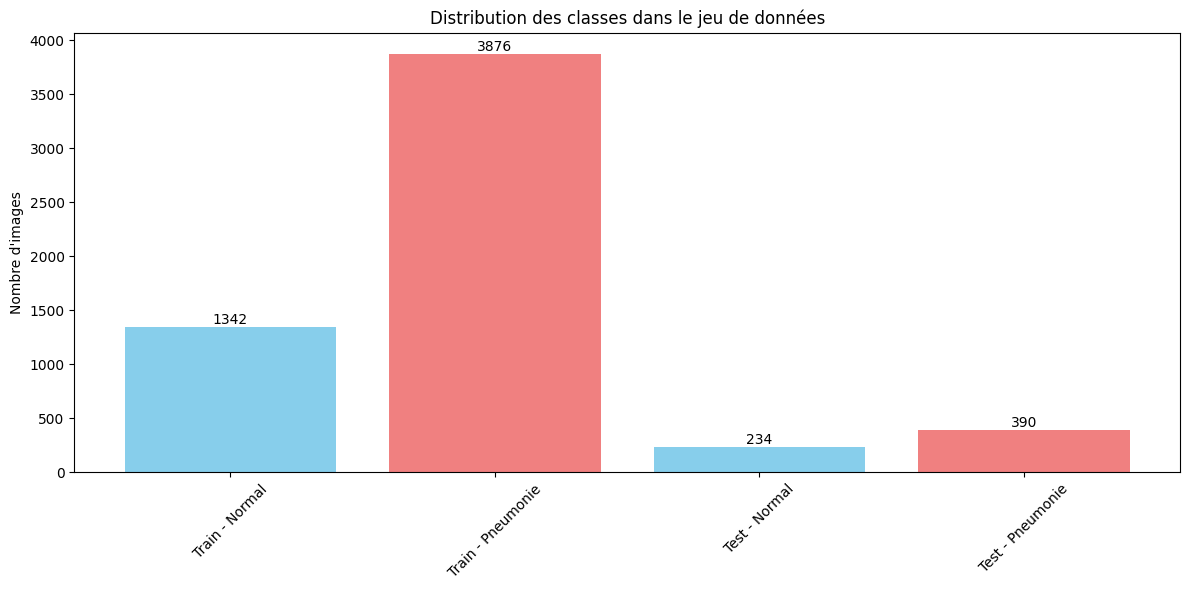

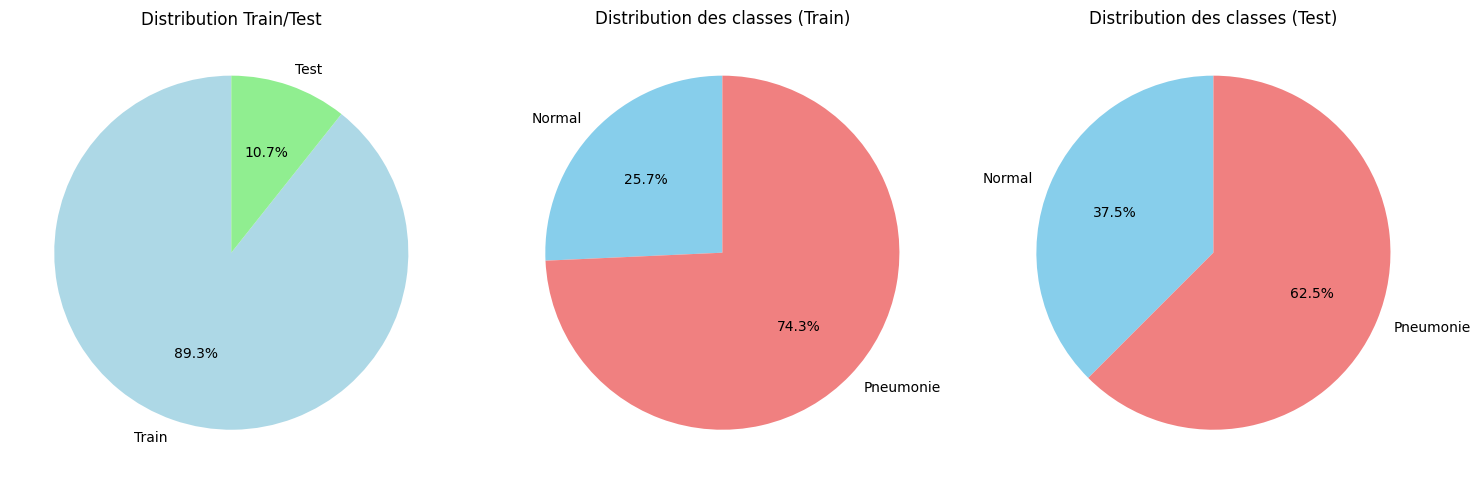

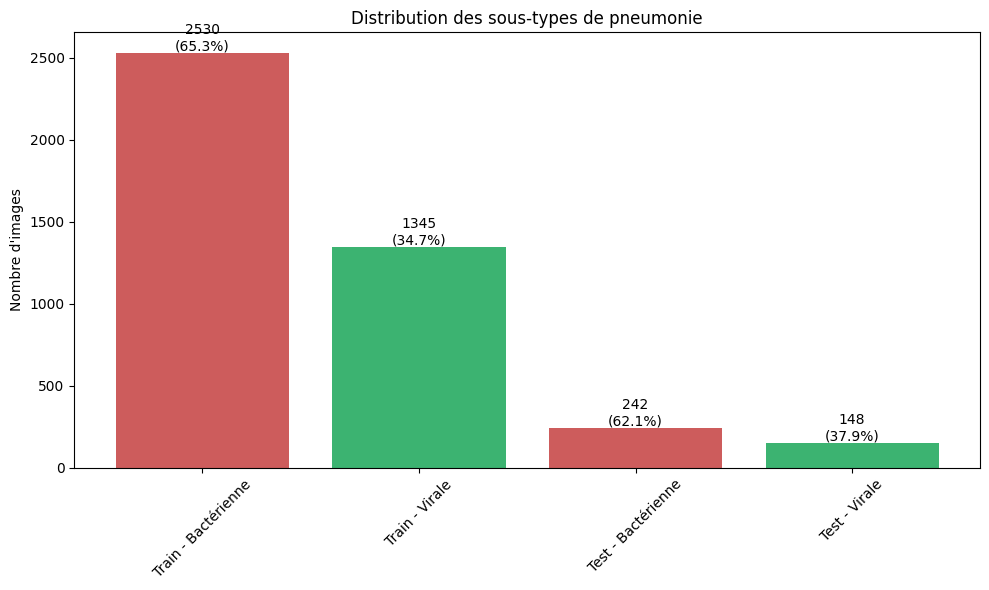

In [24]:
# Visualiser la distribution avec un graphique à barres
plt.figure(figsize=(12, 6))

# Créer les données pour le graphique
categories = ['Train - Normal', 'Train - Pneumonie', 'Test - Normal', 'Test - Pneumonie']
counts = [train_normal_count, train_pneumonia_count, test_normal_count, test_pneumonia_count]

# Créer le graphique à barres
bars = plt.bar(categories, counts, color=['skyblue', 'lightcoral', 'skyblue', 'lightcoral'])
plt.title('Distribution des classes dans le jeu de données')
plt.ylabel('Nombre d\'images')
plt.xticks(rotation=45)

# Ajouter les valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Créer des camemberts pour visualiser la proportion des classes
plt.figure(figsize=(15, 6))

# Camembert pour la distribution train/test
plt.subplot(1, 3, 1)
plt.pie([total_train, total_test], 
        labels=['Train', 'Test'],
        autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Distribution Train/Test')

# Camembert pour la distribution des classes d'entraînement
plt.subplot(1, 3, 2)
plt.pie([train_normal_count, train_pneumonia_count], 
        labels=['Normal', 'Pneumonie'],
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution des classes (Train)')

# Camembert pour la distribution des classes de test
plt.subplot(1, 3, 3)
plt.pie([test_normal_count, test_pneumonia_count], 
        labels=['Normal', 'Pneumonie'],
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution des classes (Test)')

plt.tight_layout()
plt.show()

# Visualiser la distribution des sous-types de pneumonie
plt.figure(figsize=(10, 6))

# Créer les données pour le graphique
categories = ['Train - Bactérienne', 'Train - Virale', 'Test - Bactérienne', 'Test - Virale']
counts = [train_bacteria, train_virus, test_bacteria, test_virus]
percentages = [
    f"{train_bacteria/train_pneumonia_count:.1%}",
    f"{train_virus/train_pneumonia_count:.1%}",
    f"{test_bacteria/test_pneumonia_count:.1%}",
    f"{test_virus/test_pneumonia_count:.1%}"
]

# Créer le graphique à barres
bars = plt.bar(categories, counts, color=['indianred', 'mediumseagreen', 'indianred', 'mediumseagreen'])
plt.title('Distribution des sous-types de pneumonie')
plt.ylabel('Nombre d\'images')
plt.xticks(rotation=45)

# Ajouter les valeurs sur les barres
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}\n({percentages[i]})',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

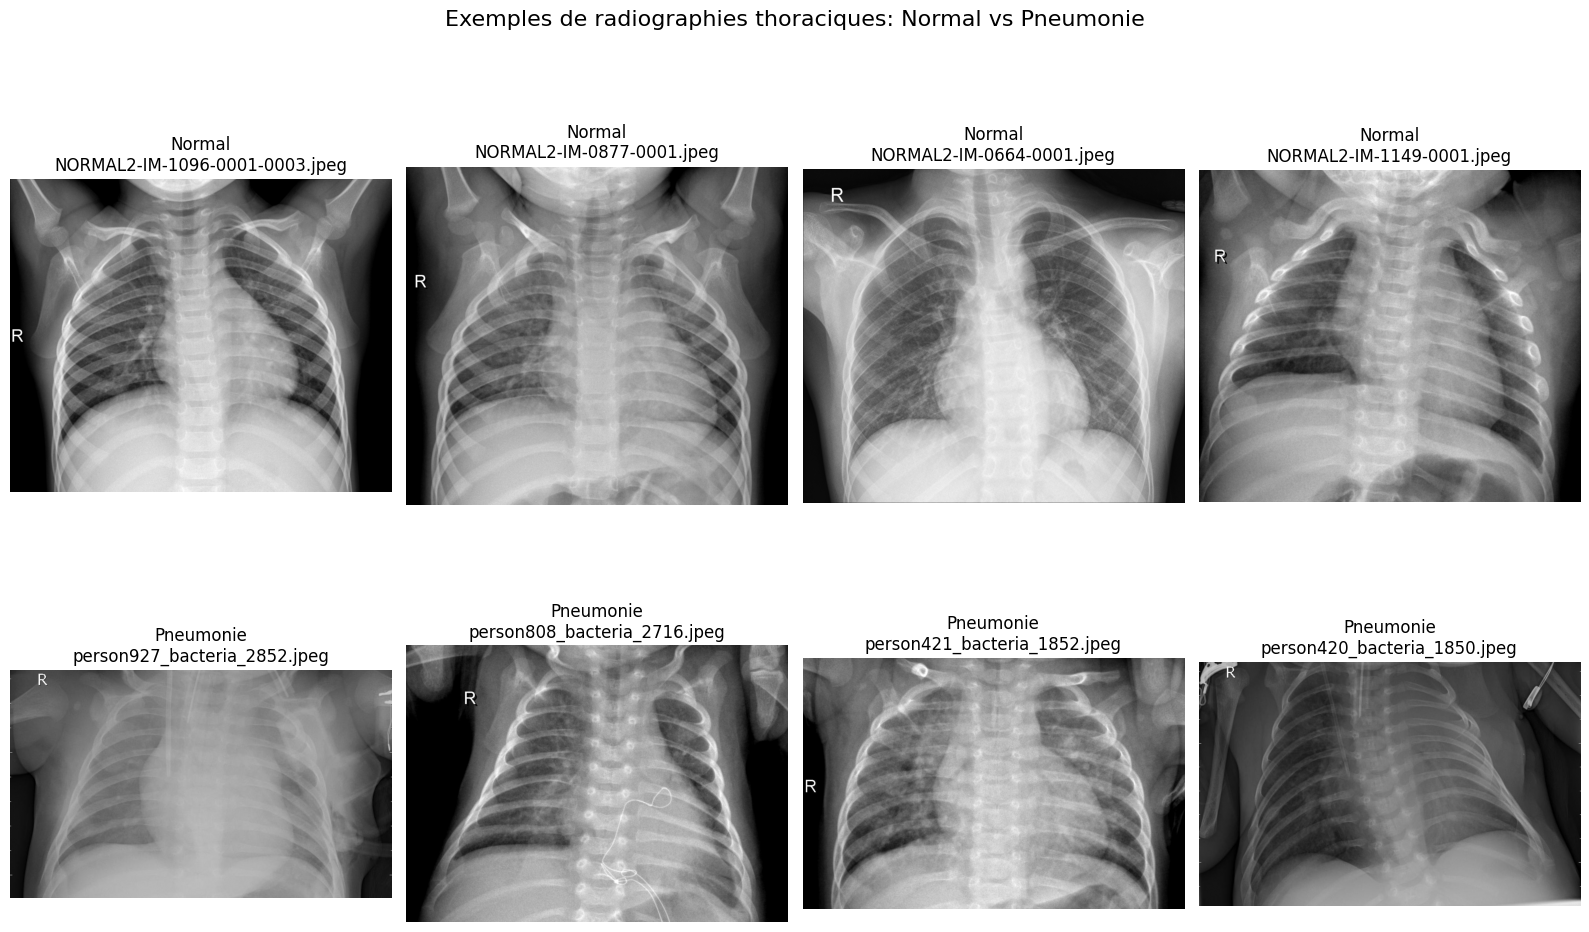

In [16]:
# Afficher des exemples d'images normales et avec pneumonie
viz.afficher_exemples_images(train_normal_dir, train_pneumonia_dir, nb_exemples=4, figsize=(16, 10))

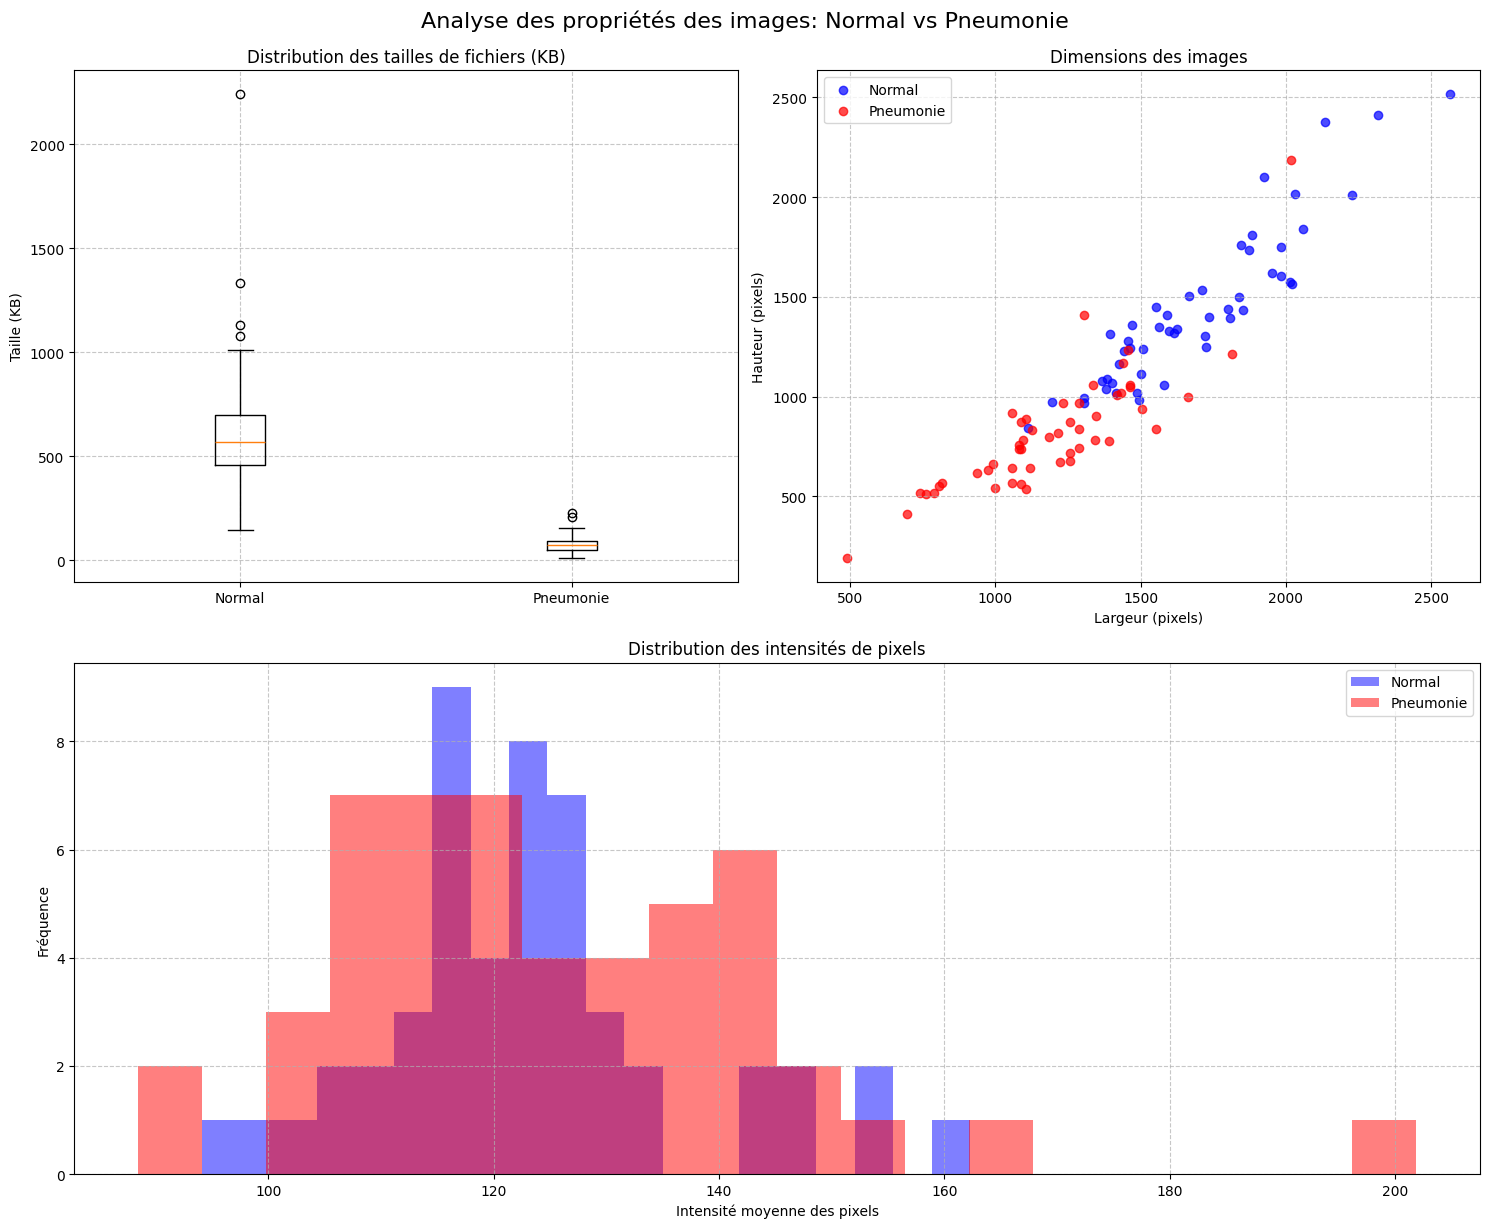


Statistiques récapitulatives:
--------------------------------------------------
Images normales (n=50):
  - Taille moyenne des fichiers: 633.39 KB
  - Intensité moyenne des pixels: 123.63
  - Dimensions les plus courantes: 1812x1882 (1 images)

Images avec pneumonie (n=50):
  - Taille moyenne des fichiers: 79.28 KB
  - Intensité moyenne des pixels: 125.12
  - Dimensions les plus courantes: 536x1104 (1 images)


In [25]:
# Analyser les propriétés des images (taille, dimensions, intensité des pixels)
viz.analyser_proprietes_images(train_normal_dir, train_pneumonia_dir, nb_echantillons=50)

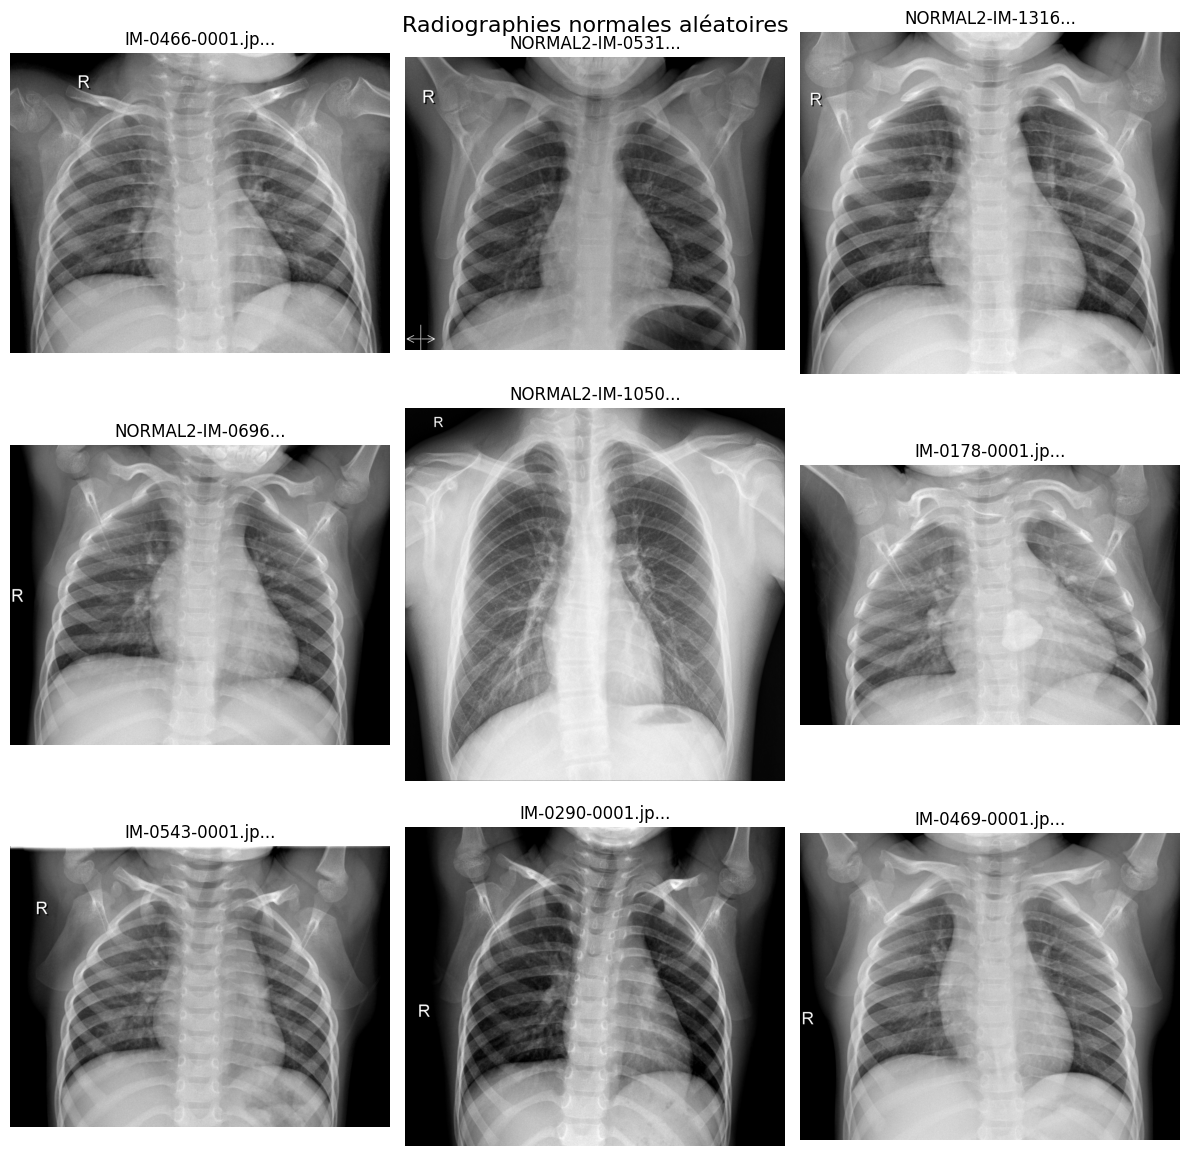

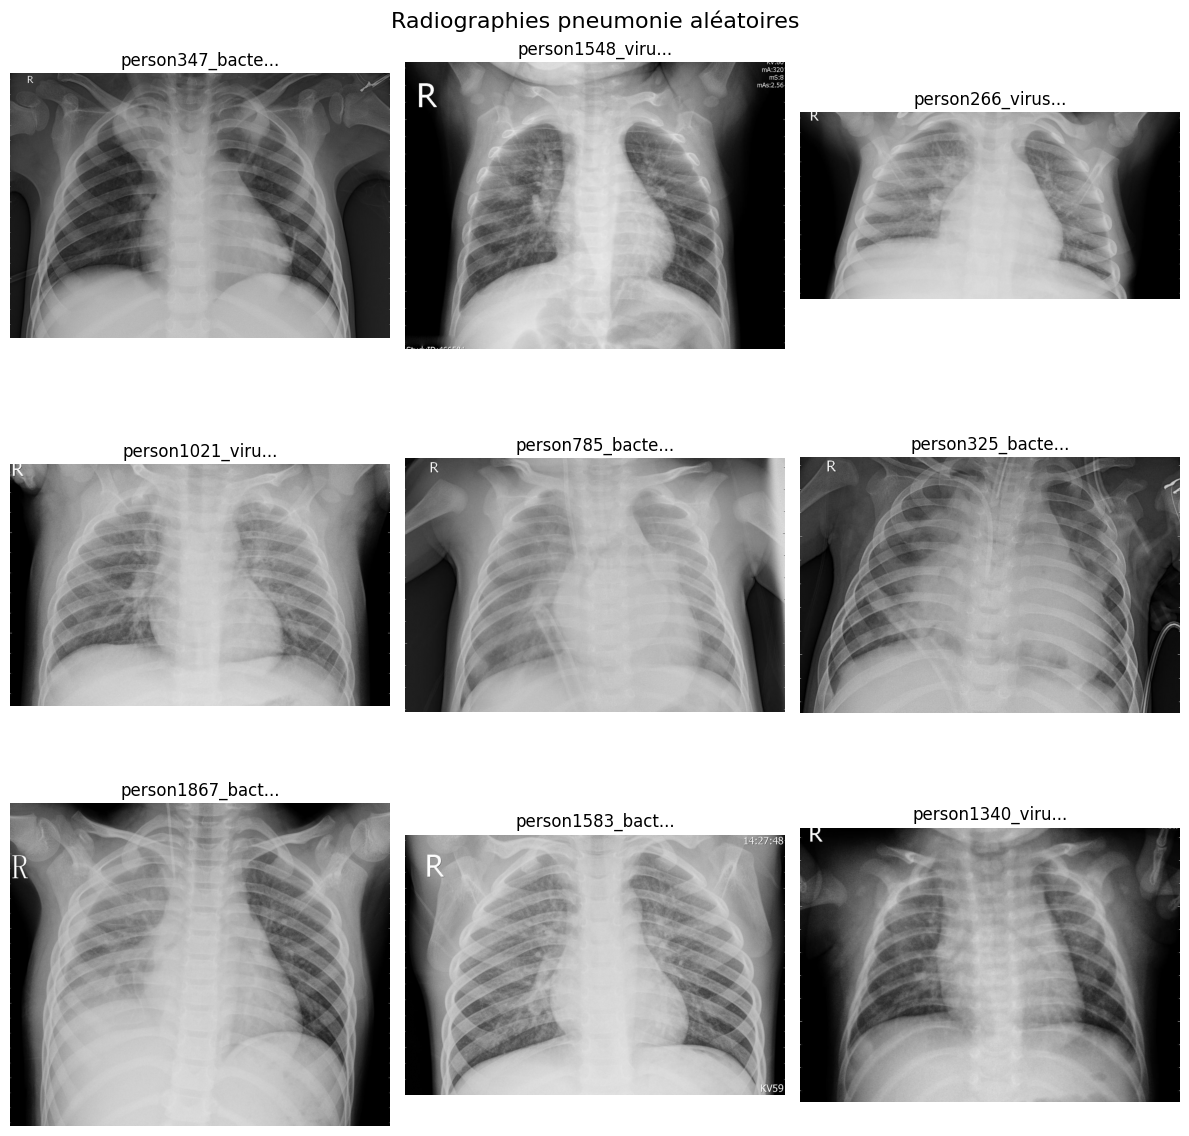

In [26]:
# Afficher une grille d'images normales
viz.afficher_grille_images(train_normal_dir, taille_grille=(3, 3), figsize=(12, 12), categorie="normales")

# Afficher une grille d'images avec pneumonie
viz.afficher_grille_images(train_pneumonia_dir, taille_grille=(3, 3), figsize=(12, 12), categorie="pneumonie")


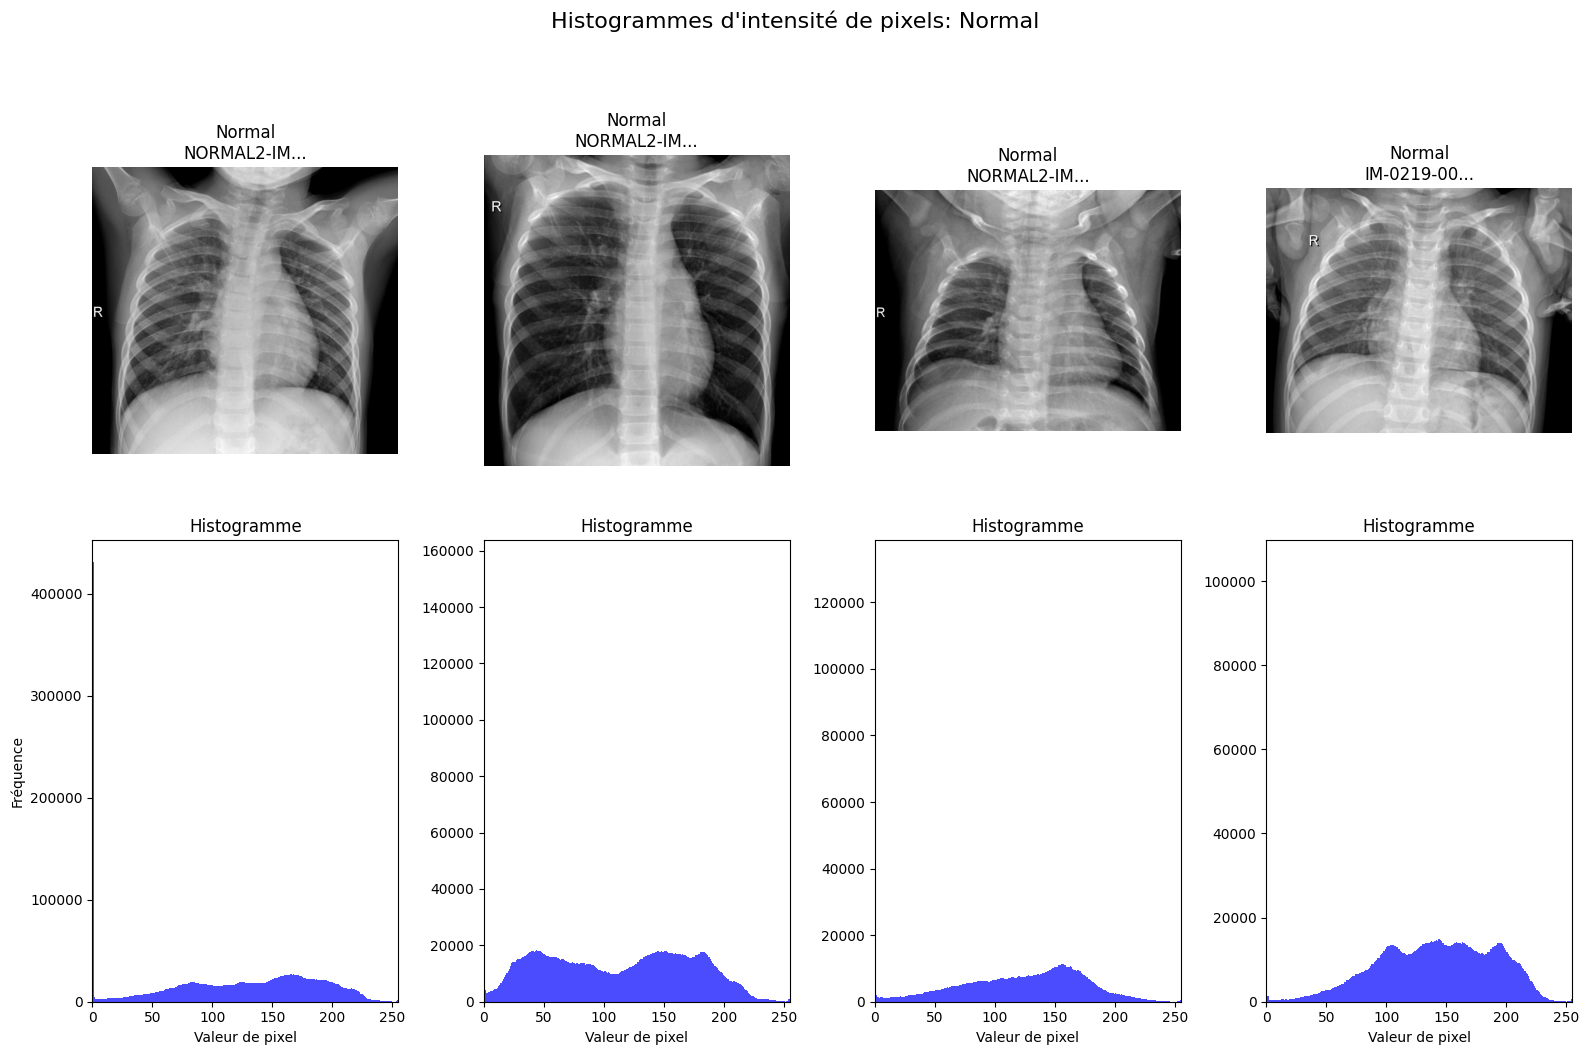

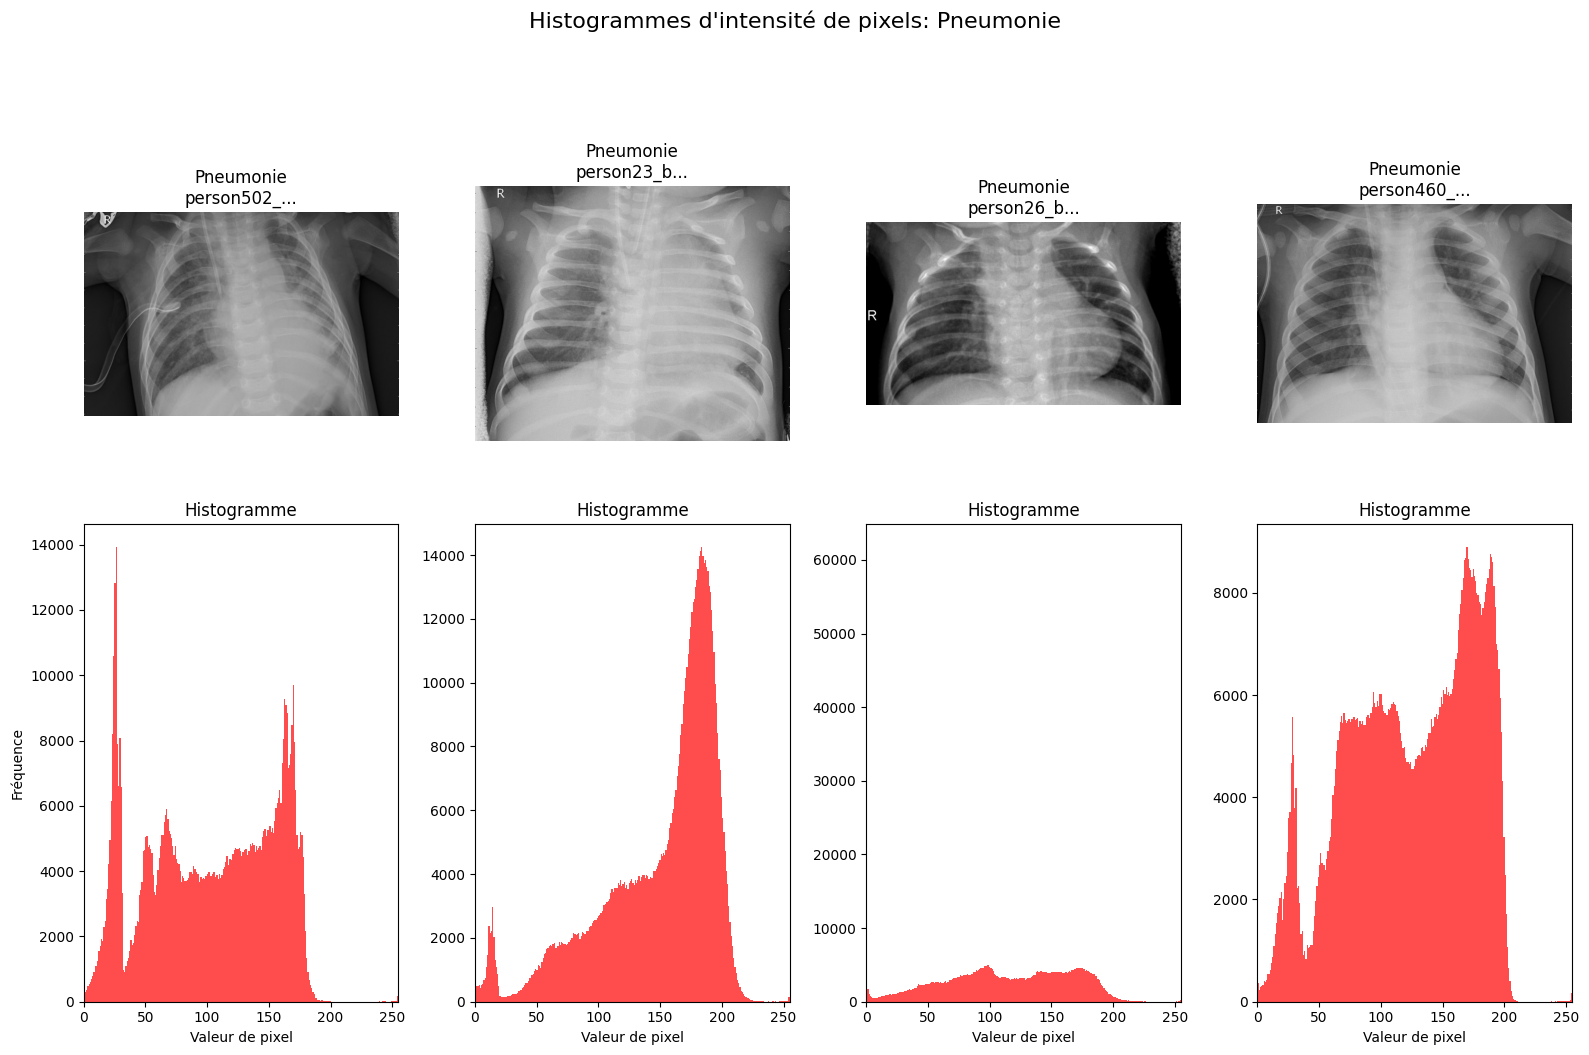

In [27]:
# Comparer les histogrammes d'intensité de pixels entre les images normales et avec pneumonie
viz.comparer_histogrammes_images(train_normal_dir, train_pneumonia_dir, nb_echantillons=4, figsize=(16, 10))